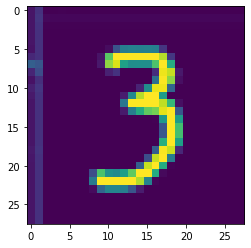

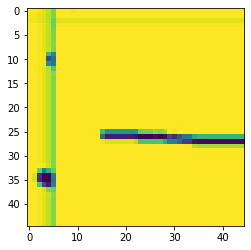

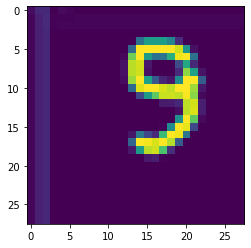

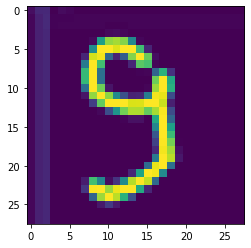

In [62]:
#from keras.models import load_model
from tkinter import *
import tensorflow as tf
import tkinter as tk
import win32gui
import PIL
from PIL import ImageGrab, Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
model_symbols = tf.keras.models.load_model('symbols.h5')
model_digits = tf.keras.models.load_model('mnist.h5')
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = PIL.ImageOps.invert(img)
    plt.imshow(img)
    plt.show()
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model_digits.predict([img])[0]
    return np.argmax(res), max(res)
def predict_symbols(img):
    img = img.resize((45,45))
    img = img.convert('L')
    #img = PIL.ImageOps.invert(img)
    plt.imshow(img)
    plt.show()
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,45,45,1)
    img = img/255.0
    #predicting the class
    res = model_symbols.predict([img])[0]
    return np.argmax(res), max(res)

class AppD1(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        self.predictedDigit = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=200, height=200, bg = "white", cursor="cross", highlightthickness=0)
        self.label = tk.Label(self, text="Draw first term", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting)
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
        self.predictedDigit = digit
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=5
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
        
class AppS(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        self.predictedSymbol = ''
        # Creating elements
        self.canvas = tk.Canvas(self, width=200, height=200, bg = "white", cursor="cross", highlightthickness=0)
        self.label = tk.Label(self, text="Draw operation", font=("Helvetica", 24))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting)
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_symbols(im)
        if digit == 0:
            self.predictedSymbol = '+'
        if digit == 1:
            self.predictedSymbol = '-'
        if digit == 2:
            self.predictedSymbol = 'x'
        self.label.configure(text= self.predictedSymbol+', '+ str(int(acc*100))+'%') 
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=2
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
        
class AppD2(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        self.predictedDigit = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=200, height=200, bg = "white", cursor="cross", highlightthickness=0)
        self.label = tk.Label(self, text="Draw second term", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting)
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
        self.predictedDigit = digit
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=5
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')        
        
app1 = AppD1()
app2 = AppS()
app3 = AppD2()
mainloop()

In [63]:
if app2.predictedSymbol == '+':
    print(app1.predictedDigit + app3.predictedDigit)
if app2.predictedSymbol == '-':
    print(app1.predictedDigit - app3.predictedDigit)
if app2.predictedSymbol == 'x':
    print(app1.predictedDigit * app3.predictedDigit)

-6
